# Bird Species Classification with CNN

This notebook implements a convolutional neural network (CNN) for classifying bird species using spectrogram data.


## 1. Import Required Libraries


In [2]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


## 2. Load Dataset

Load preprocessed spectrogram data from HDF5 file.


In [3]:
with h5py.File('../data/bird_spectrograms_splits.hdf5', 'r') as f:
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_val = f['X_val'][:]
    y_val = f['y_val'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

num_classes = len(np.unique(y_train))
species_labels = [
    'amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin',
    'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa'
]


## 3. Data Preprocessing

Add channel dimension and one-hot encode labels.


In [4]:
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


## 4. Build the CNN Model

Three convolutional blocks with max pooling, global average pooling, dropout, and dense layers.


In [5]:
input_shape = X_train_cnn.shape[1:]
model = models.Sequential([
    layers.Reshape((343, 256, 1), input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mae']
)
model.summary()


c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 343, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 343, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 171, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 171, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 85, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 85, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,732 (432.55 KB)

 Trainable params: 110,732 (432.55 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

Train for 20 epochs with batch size 32.


In [6]:
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_cnn, y_val_cat)
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.0783 - loss: 2.4820 - mae: 0.1526 - val_accuracy: 0.1905 - val_loss: 2.3449 - val_mae: 0.1505
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2055 - loss: 2.0997 - mae: 0.1432 - val_accuracy: 0.4242 - val_loss: 1.3389 - val_mae: 0.1199
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3439 - loss: 1.5248 - mae: 0.1215 - val_accuracy: 0.5238 - val_loss: 1.2560 - val_mae: 0.1130
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4043 - loss: 1.3263 - mae: 0.1143 - val_accuracy: 0.5931 - val_loss: 1.0362 - val_mae: 0.1007
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4428 - loss: 1.2149 - mae: 0.1077 - val_accuracy: 0.5455 - val_loss: 0.9615 - val_mae: 0.0986
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4906 - loss: 1.1061 - mae: 0.1013 - val_accuracy: 0.5281 - val_loss: 0.9896 - val_mae: 0.0964
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - 

## 6. Visualize Training Metrics

Plot loss, MAE, and accuracy curves.


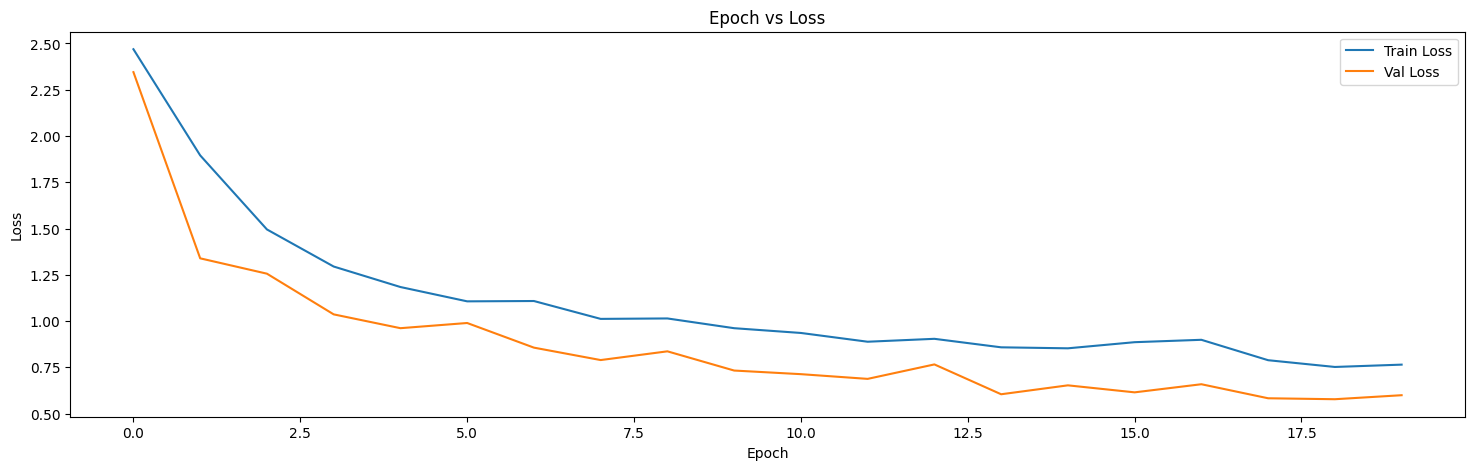

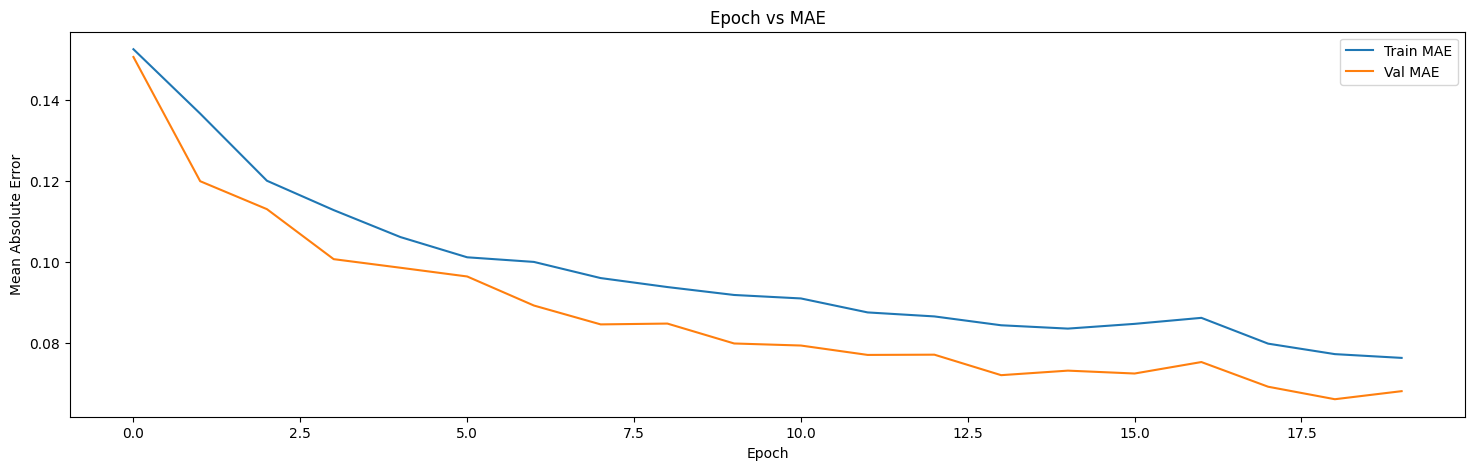

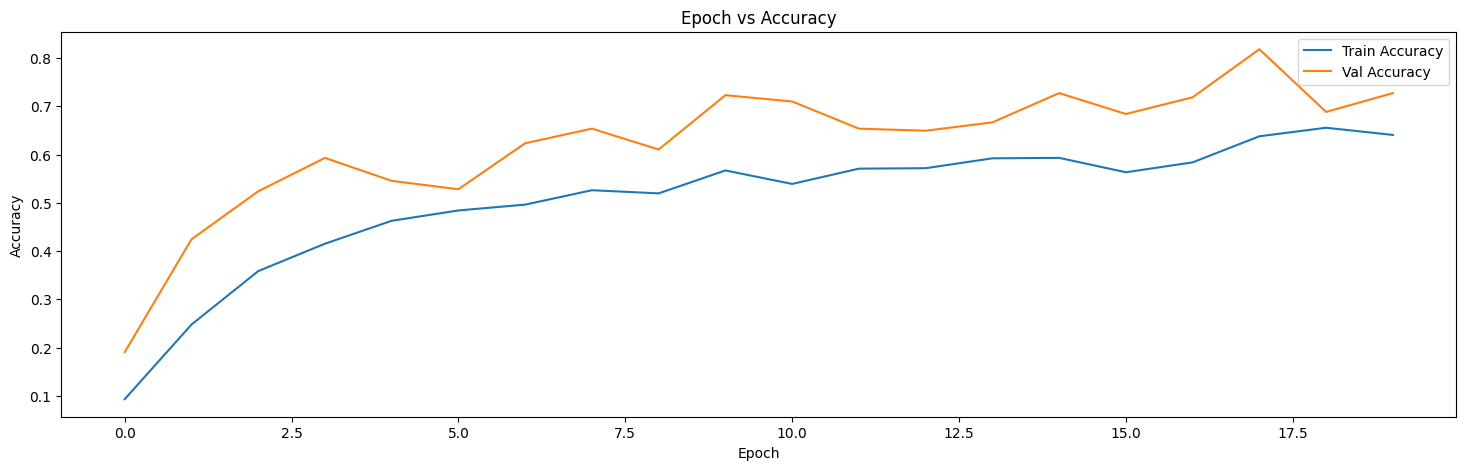

In [7]:
plt.figure(figsize=(18, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.savefig('../results/figures/epoch_vs_loss_multiclass.png')
plt.legend()
plt.show()

mae_key = 'mae' if 'mae' in history.history else 'mean_absolute_error'
val_mae_key = 'val_mae' if 'val_mae' in history.history else 'val_mean_absolute_error'
plt.figure(figsize=(18, 5))
plt.plot(history.history[mae_key], label='Train MAE')
plt.plot(history.history[val_mae_key], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Epoch vs MAE')
plt.savefig('../results/figures/epoch_vs_mae_multiclass.png')
plt.legend()
plt.show()

plt.figure(figsize=(18, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.savefig('../results/figures/epoch_vs_accuracy_multiclass.png')
plt.legend()
plt.show()


## 7. Evaluate Model Performance

Test set accuracy, MAE, confusion matrix, and classification report.


In [8]:
test_loss, test_acc, test_mae = model.evaluate(X_test_cnn, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.3f}, Test MAE: {test_mae:.3f}")
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_labels))


8/8 - 2s - 216ms/step - accuracy: 0.7186 - loss: 0.6196 - mae: 0.0683
Test accuracy: 0.719, Test MAE: 0.068
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step
Confusion Matrix:
[[17  0  0  0  0  0  0  0  0  0  0  2]
 [ 0 18  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  6  0  0  0  0]
 [ 0  0  3  0 11  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  9  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19]]

Classification Report:
              precision    recall  f1-score   support

      amecro       1.00      0.89      0.94        19
      amerob       1.00      0.95      0.97        19
      bewwre       0.61      1.00      0.76        19
      bkcchi       1.00      0.70      0.82        20
      daejun       1.00      0.58      0.73        19
      houfin     

c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 9. Save Model


In [9]:
model.save('../models/multi_class.h5')


In [10]:
# Save model weights after training
model.save_weights("../models/multiclass_weights.weights.h5")



# Conclusion

This notebook implemented a convolutional neural network (CNN) for multi-class classification of bird species using spectrogram data. The model architecture and training approach demonstrated the effectiveness of deep learning for audio recognition tasks.

## Model Architecture

A sequential CNN was implemented with:
- Input spectrograms reshaped to (343, 256, 1)
- Three convolutional blocks with increasing filter sizes:
  - Conv2D (32 filters) → MaxPooling → Conv2D (64 filters) → MaxPooling → Conv2D (128 filters) → MaxPooling
- Global average pooling to reduce spatial dimensions
- Dropout (0.3) for regularization
- Two dense layers (128 units, then 12 output units with softmax activation)
- Total parameters: 110,732

## Training Results

The model was trained for 20 epochs with the following progression:
- Initial training accuracy: 7.83% → Final: 65.40%
- Initial validation accuracy: 19.05% → Final: 72.73%
- Initial validation loss: 2.3449 → Final: 0.5994
- Initial validation MAE: 0.1505 → Final: 0.0682

The training curves show steady improvement, with the validation accuracy peaking at 81.82% in epoch 18, suggesting effective learning of spectrogram patterns. The model demonstrated strong convergence with both loss and mean absolute error consistently decreasing throughout training.

## Evaluation Results

The model's performance on the test set:
- Test accuracy: 71.9%
- Test MAE: 0.068

The classification report revealed varying performance across species:
- Strong performance (F1 > 0.90) for: amecro (0.94), amerob (0.97), rewbla (0.97)
- Moderate performance (F1 0.70-0.90) for: bewwre (0.76), bkcchi (0.82), norfli (0.87)
- Weak performance (F1 0.50-0.70) for: daejun (0.73), sonspa (0.66), spotow (0.59), whcspa (0.64)
- Failed completely on: houfin and houspa (0.00)

The confusion matrix shows that misclassifications were not randomly distributed; certain species were consistently confused with specific others, suggesting acoustic similarities between these birds.

## Summary

This multi-class bird species classification model achieved reasonable performance for a 12-class problem with limited training data. The CNN successfully learned meaningful features from spectrogram representations of bird calls, demonstrating that deep learning approaches can effectively discriminate between different bird species based on their vocalizations.

The varying performance across classes highlights the challenges in bird sound classification - some species have highly distinctive calls, while others share acoustic characteristics that make differentiation more difficult. Future improvements could focus on addressing the classes where the model performed poorly through data augmentation, model architecture refinements, or ensemble approaches.
